## Задача проекта:


Отследить влияние условий жизни обучающихся в возрасте от 15 до 22 лет на успеваемость по математике с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы и выявлять учеников, находящихся в группе риска. Провесте разведывательный анализ данных EDA и составить отчёт по его результатам, чтобы выявить статистически значимые параметры по отношению к целевой переменной для будущей модели.

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [261]:
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

## Описание данных



school — аббревиатура школы, в которой учится ученик <br/>
sex — пол ученика ('F' - женский, 'M' - мужской)<br/>
age — возраст ученика (от 15 до 22)<br/>
address — тип адреса ученика ('U' - городской, 'R' - за городом)<br/>
famsize — размер семьи('LE3' <= 3, 'GT3' >3)<br/>
Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)<br/>
Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)<br/>
Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)<br/>
Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)<br/>
Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)<br/>
reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)<br/>
guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)<br/>
traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)<br/>
studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)<br/>
failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)<br/>
schoolsup — дополнительная образовательная поддержка (yes или no)<br/>
famsup — семейная образовательная поддержка (yes или no)<br/>
paid — дополнительные платные занятия по математике (yes или no)<br/>
activities — дополнительные внеучебные занятия (yes или no)<br/>
nursery — посещал детский сад (yes или no)<br/>
higher — хочет получить высшее образование (yes или no)<br/>
internet — наличие интернета дома (yes или no)<br/>
romantic — в романтических отношениях (yes или no)<br/>
famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)<br/>
freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)<br/>
goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)<br/>
health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)<br/>
absences — количество пропущенных занятий<br/>
score — баллы по госэкзамену по математике<br/>

In [262]:
# Исправляем названия столбцов:
stud_math.columns = [i.lower() for i in stud_math.columns]
stud_math.rename({'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu',
                  'Mjob': 'mjob', 'Fjob': 'fjob', 'studytime, granular': 'studytime_granular'}, inplace=True, axis=1)

In [263]:
stud_math

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [264]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   pstatus             350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

In [265]:
# Cписок отсутствующих записей для каждого признака
for col in stud_math.columns:
    pct_missing = np.mean(stud_math[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0%
sex - 0%
age - 0%
address - 4%
famsize - 7%
pstatus - 11%
medu - 1%
fedu - 6%
mjob - 5%
fjob - 9%
reason - 4%
guardian - 8%
traveltime - 7%
studytime - 2%
failures - 6%
schoolsup - 2%
famsup - 10%
paid - 10%
activities - 4%
nursery - 4%
studytime_granular - 2%
higher - 5%
internet - 9%
romantic - 8%
famrel - 7%
freetime - 3%
goout - 2%
health - 4%
absences - 3%
score - 2%


In [266]:
stud_math.describe()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [267]:
# В целевой переменной не должно быть пропусков
stud_math.dropna(subset=['score'], inplace=True)

In [268]:
# Замена значений для всех числовых признаков
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

In [269]:
# Замена значений для всех категориальных признаков
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

        top = df[col].describe()['top']  # impute with the most frequent value.
        df[col] = df[col].fillna(top)

In [270]:
# Воспользуемся формулой интерквартильного расстояния для фильтрации выбросов
#IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
#perc25 = stud_math.absences.quantile(0.25)
#perc75 = stud_math.absences.quantile(0.75)

# print(
#'25-й перцентиль: {},'.format(perc25),
#'75-й перцентиль: {},'.format(perc75),
#"IQR: {}, ".format(IQR),
# "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

# stud_math.absences.loc[stud_math.absences.between(
#perc25 - 1.5*IQR,
# perc75 + 1.5*IQR)].hist(bins = 8, range = (4, 10), label = 'IQR')

# stud_math.absences.loc[stud_math.absences <= 100].hist(
# alpha = 0.5, bins = 8, range = (40, 100), label = 'Здравый смысл')

# plt.legend();

In [271]:
# Определение выбросов
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(data=stud_math, x=column)
  #  plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

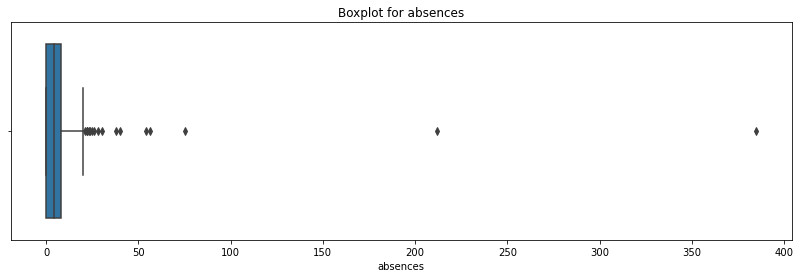

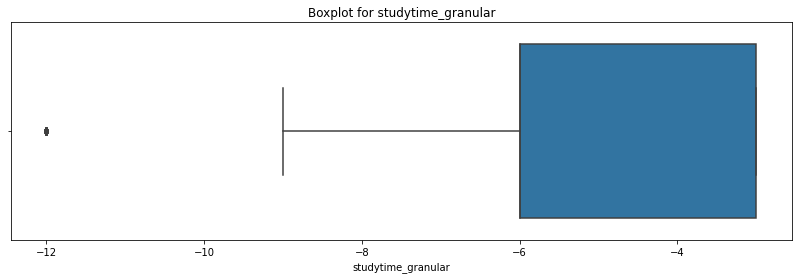

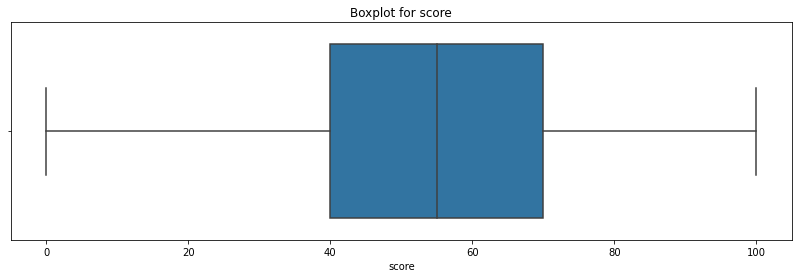

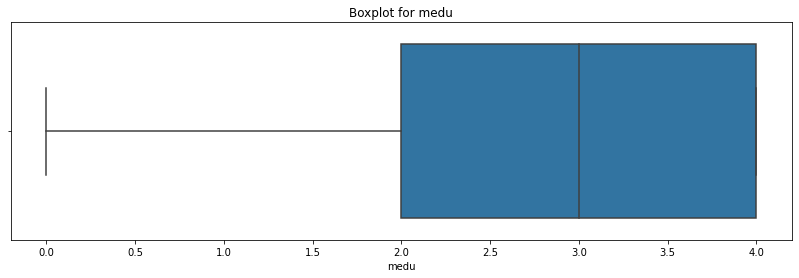

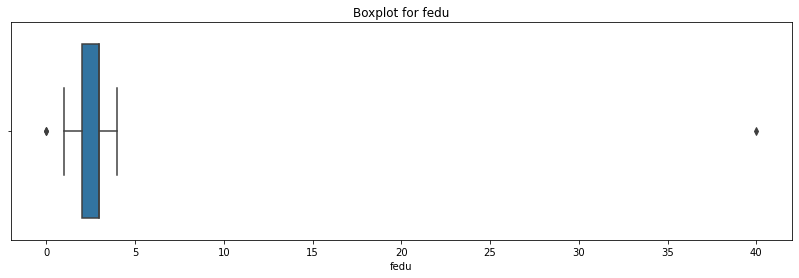

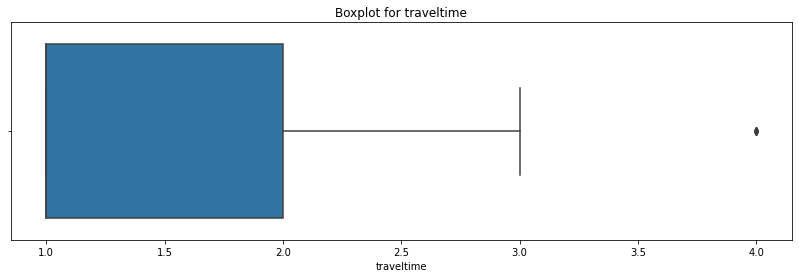

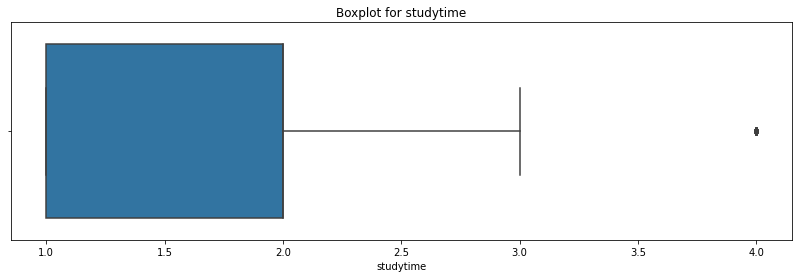

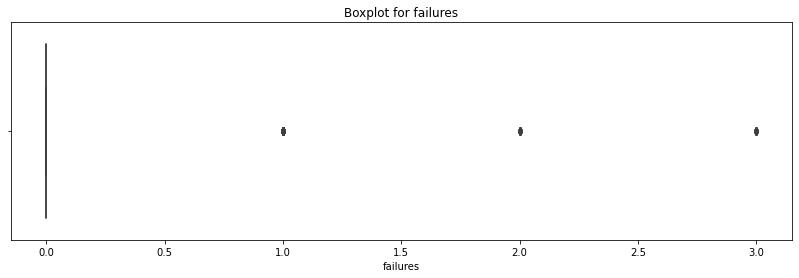

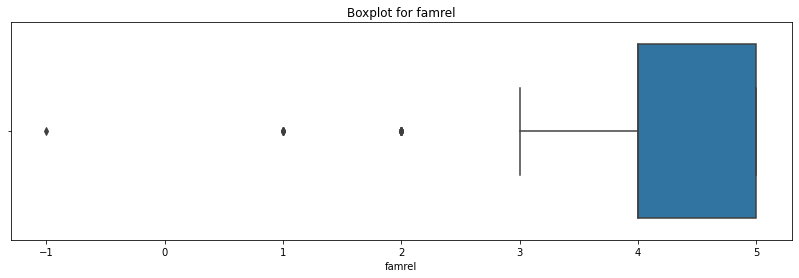

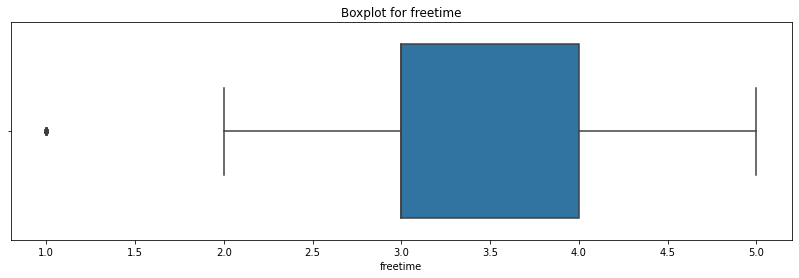

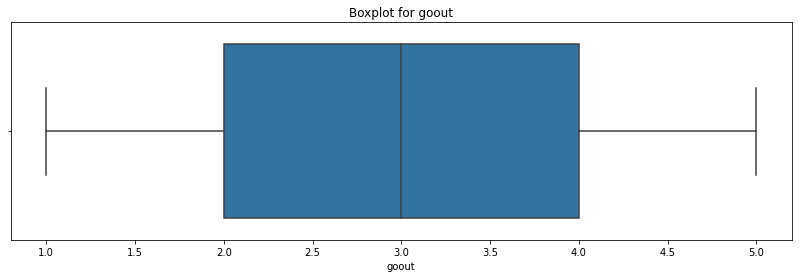

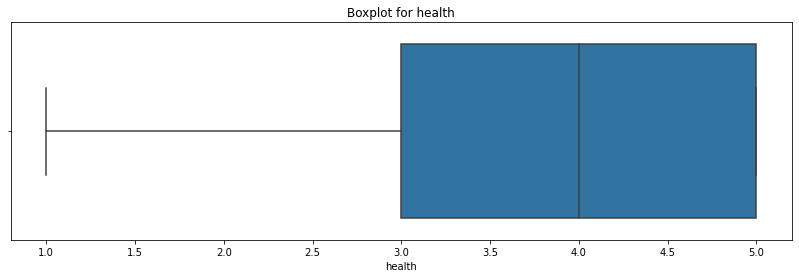

In [272]:
for col in ['absences', 'studytime_granular', 'score', 'medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

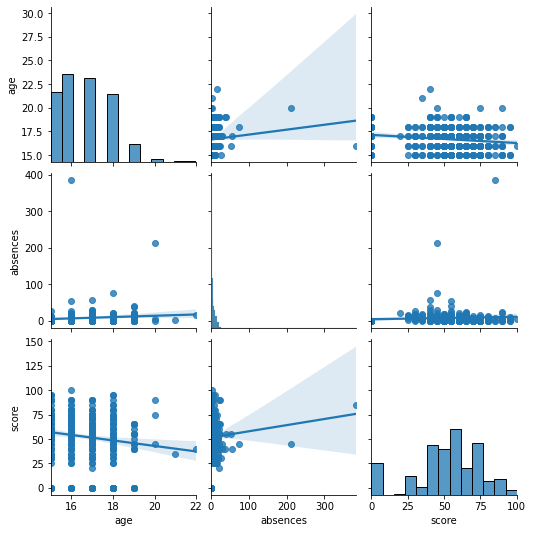

In [273]:
# Корреляции (рассмотрим только для числовых столбцов)
stud_math_2 = ['age', 'absences', 'score']
sns.pairplot(stud_math[stud_math_2], kind='reg')

In [274]:
stud_math[stud_math_2].corr()

,age,absences,score
age,1.000000,0.096628,-0.155726
absences,0.096628,1.000000,0.065283
score,-0.155726,0.065283,1.000000


In [275]:
# Анализ номинативных переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

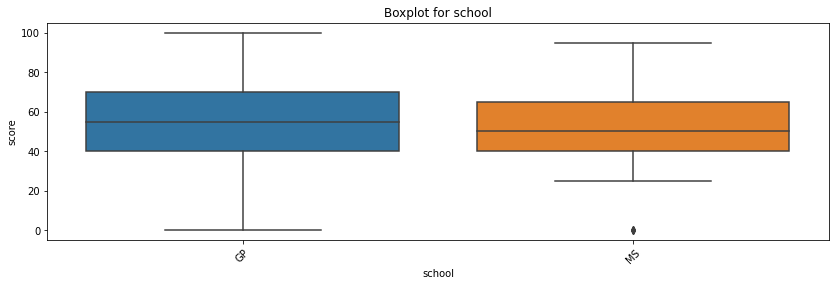

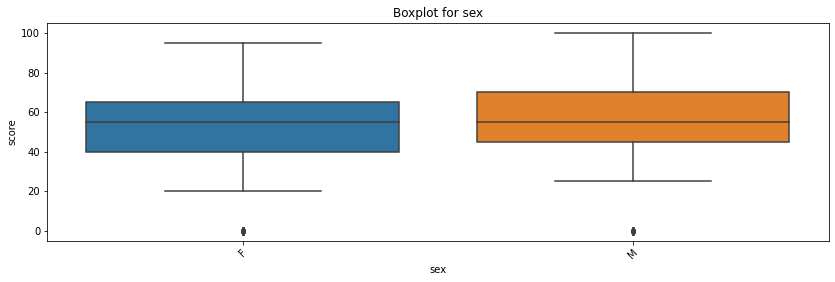

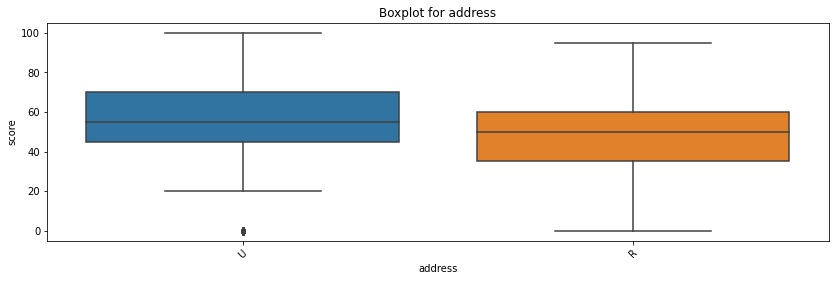

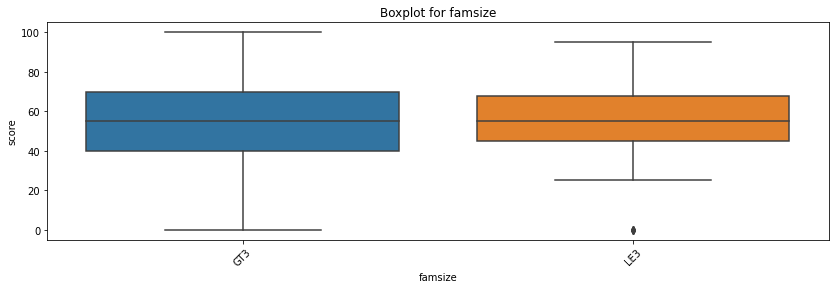

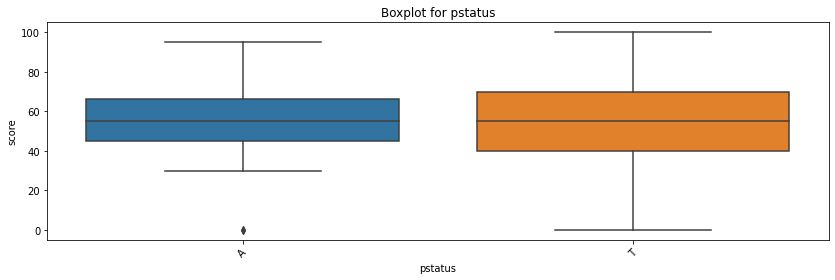

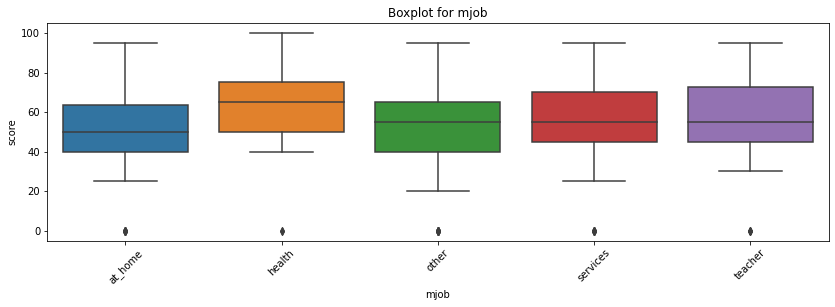

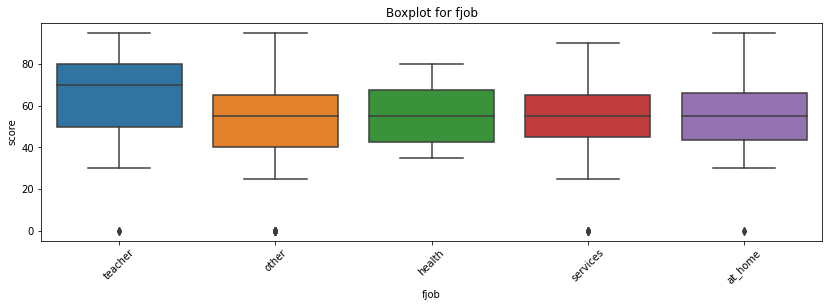

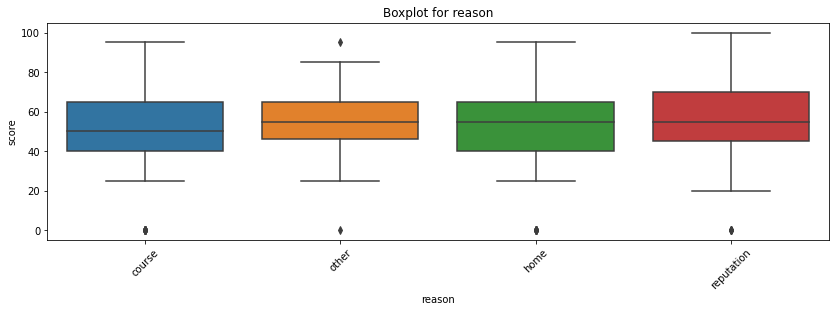

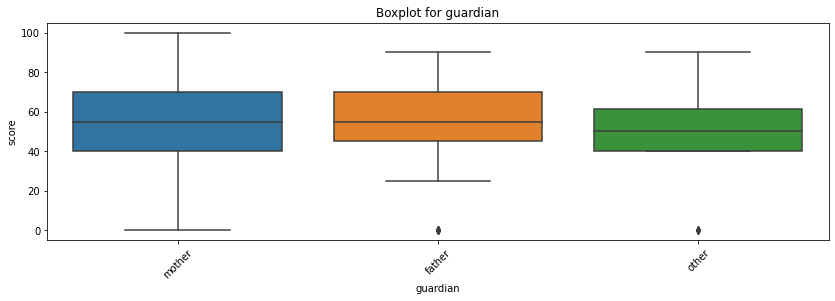

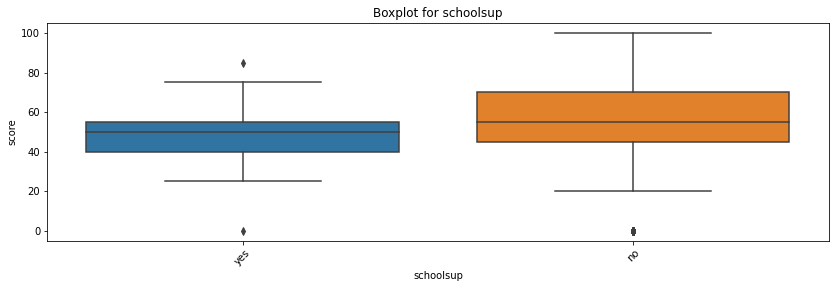

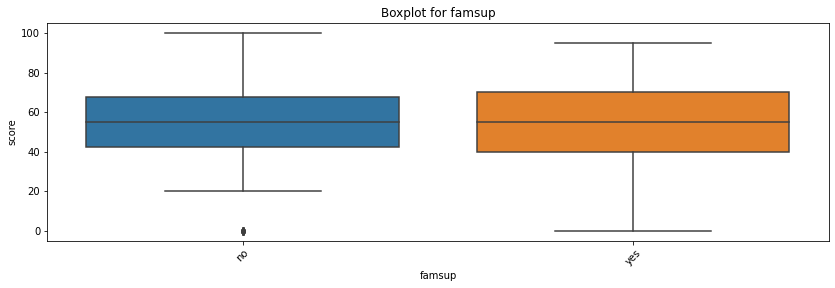

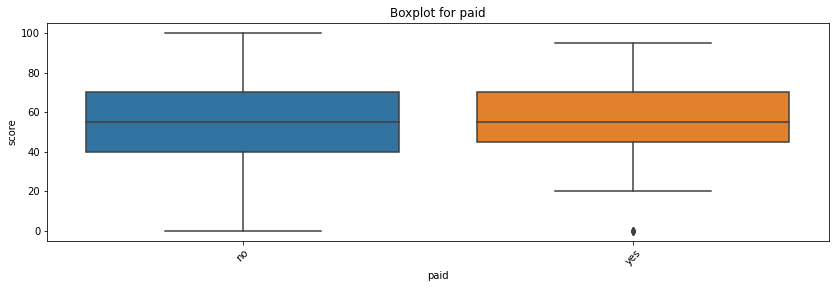

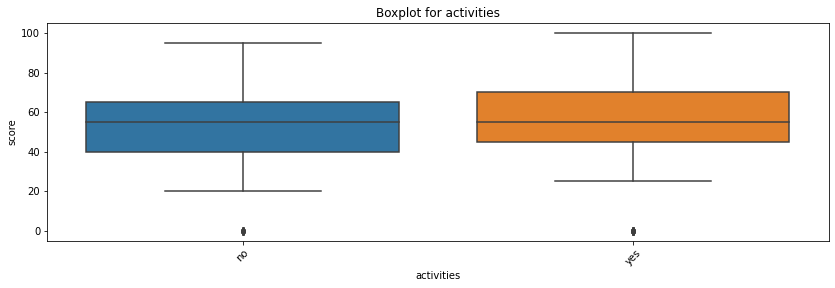

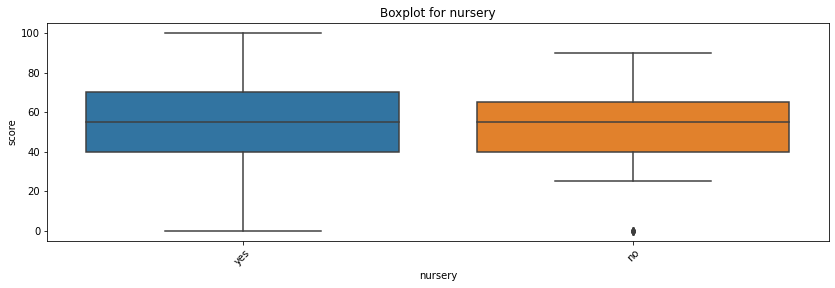

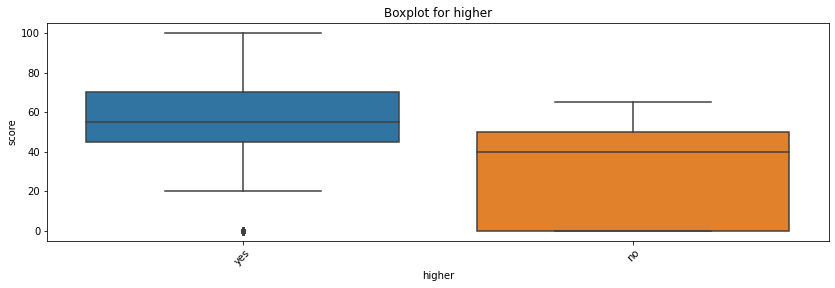

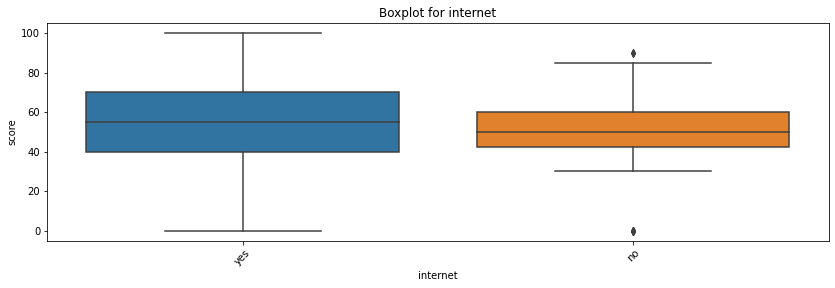

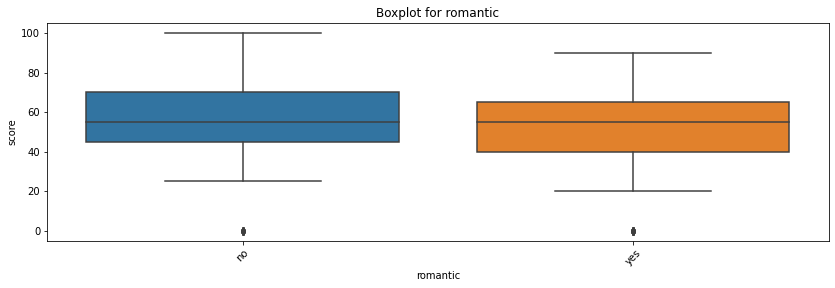

In [276]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus',
            'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic']:
    get_boxplot(col)

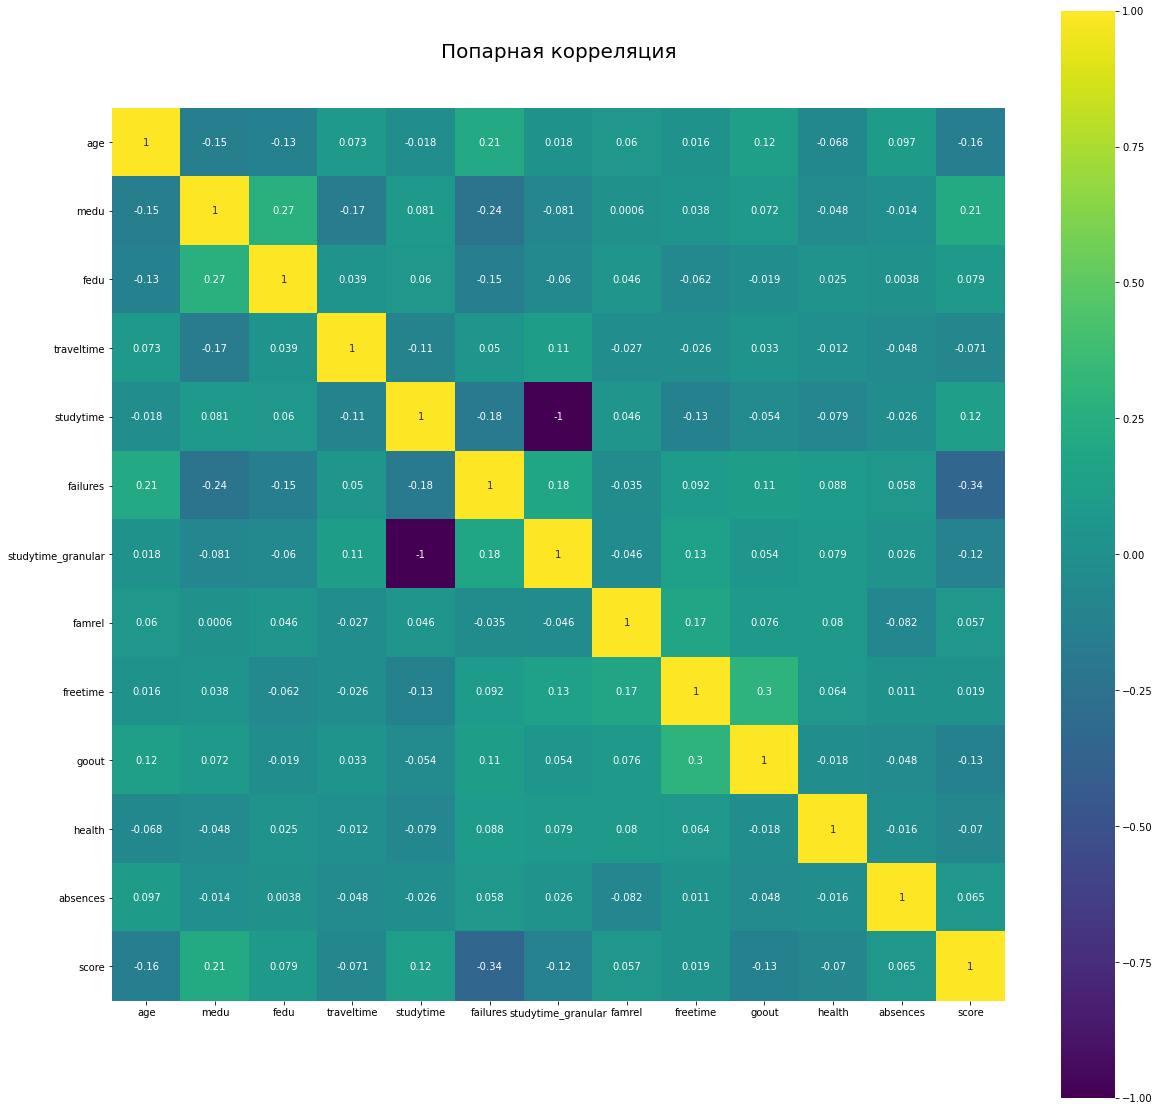

In [277]:
# Попарная корреляция
colormap = plt.cm.viridis
plt.figure(figsize=(20, 20))
plt.title('Попарная корреляция', y=1.05, size=20)
sns.heatmap(stud_math.corr(), square=True, annot=True, cmap=colormap)
plt.show()

Удаляем столбец 'studytime_granular', так как он коррелирует со столбцом 'studytime'


In [278]:
stud_math.drop('studytime_granular', axis=1, inplace=True)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, при помощи критерия t- Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов на экзамене по различным параметрам неразличимы:

In [279]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:20]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [280]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus',
            'mjob', 'fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


В выборке были найдены и заменены пропуски на медианные значения для количественных признаков и наиболее встречающиеся для категориальных признаков. Выбросы обнаружены в признаках: fedu, famrel, absences, studytime_granulor. В целевой переменной убраны пропуски. Присутствует небольшая линейная зависимость целевой переменной от признака количества пропущенных занятий. На успеваемость оказывают влияние следующие признаки: количество внеучебных неудач, возраст, образование родителей, проведение времени с друзьями.